# Bayes factor

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # Default seaborn theme, scaling & color palette

## Coin tossing data

In [5]:
coins = 30 
heads = 9
y = np.repeat([0, 1], [coins-heads, heads])
print('coin tosses:\n', y)

coin tosses:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]


## Calculate Bayes factor

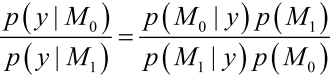

Choosing between two models - same likelihood, different priors

In [7]:
import pymc3 as pm

In [9]:
model_BF = pm.Model()
with model_BF:
    # model choice
    p = np.array([0.5, 0.5])  # prior prob of choosing each model
    model_index = pm.Categorical('model_index', p=p)  # return 0 or 1 model index with prob = p
    
    # beta prior dist params
    m_0 = (4, 8)  # model 0
    m_1 = (8, 4)  # model 1
    m = pm.math.switch(pm.math.eq(model_index, 0), m_0, m_1)
    
    # beta prior
    theta = pm.Beta('theta', m[0], m[1])
    
    # likelihood
    y = pm.Bernoulli('y', theta, observed=y)

In [10]:
with model_BF:
    trace_BF = pm.sample(5000)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>BinaryGibbsMetropolis: [model_index]
>NUTS: [theta]
Sampling 4 chains, 0 divergences: 100%|██████████| 22000/22000 [00:05<00:00, 3734.91draws/s]


/home/sean/anaconda3/envs/bayesian_data_analysis_with_python/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/home/sean/anaconda3/envs/bayesian_data_analysis_with_python/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/home/sean/anaconda3/envs/bayesian_data_analysis_with_python/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/home/sean/anaconda3/envs/bayesian_data_analysis_with_python/lib/python3.7/s

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f810f66bd90>,
      dtype=object)

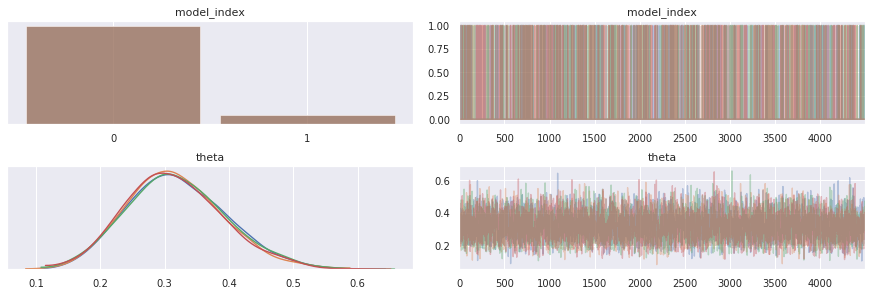

In [11]:
chain_BF = trace_BF[500:]
pm.traceplot(chain_BF)

In [20]:
pM1 = chain_BF['model_index'].mean()
pM0 = 1 - pM1
BF = (pM0/pM1)*(p[1]/p[0])

print('Prob model 0: {:.1f} %'.format(100*pM0))
print('Prob model 1: {:.1f} %'.format(100*pM1))

print('Bayes factor: {:.1f}'.format(BF))

Prob model 0: 91.7 %
Prob model 1: 8.3 %
Bayes factor: 11.1
